In [1]:
# !pip3 install wordcloud

In [2]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
csv_file = '../data/emails.csv'

In [4]:
df = pd.read_csv(csv_file)

In [5]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Exploratory Data Analysis

In [6]:
# number of records already marked as spam
spam_count = len(df.loc[df['spam'] == 1].index)

In [7]:
# number of records marked as not spam
non_spam_count = len(df.loc[df['spam'] == 0].index)

In [8]:
# count of records:
print(f'Spam: {spam_count}')
print(f'Non Spam: {non_spam_count}')

Spam: 1368
Non Spam: 4360


In [9]:
# identify if there are any duplicates in the dataset
mask = df.duplicated()
df[mask]

,text,spam
2155,Subject: research allocations to egm hi becky...,0
2260,Subject: departure of grant masson the resear...,0
2412,"Subject: re : schedule and more . . jinbaek ,...",0
2473,"Subject: day off tuesday stinson , i would l...",0
2763,"Subject: re : your mail zhendong , dr . kami...",0
3123,"Subject: re : grades pam , the students rese...",0
3152,Subject: tiger evals - attachment tiger hosts...,0
3248,"Subject: re : i am zhendong zhendong , thank...",0
3249,Subject: hello from enron dear dr . mcmullen ...,0
3387,"Subject: term paper dr . kaminski , attached...",0


In [10]:
len(df[mask].index)

33

In [11]:
df_unique = df.drop_duplicates()
df_unique.reset_index(inplace=True, drop=True)

In [12]:
spam_count = len(df_unique.loc[df_unique['spam'] == 1].index)
non_spam_count = len(df_unique.loc[df_unique['spam'] == 0].index)

print(f'Spam: {spam_count}')
print(f'Non Spam: {non_spam_count}')

Spam: 1368
Non Spam: 4327


## What is a word cloud?

Word clouds are a useful in visualizing text data by clearly indicating the word frequency weightages. Words that appear more frequently appear larger in the cloud.

In [13]:
df_unique.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [14]:
# cleaning the text
clean_text_collection = []

for word in range(len(df_unique['text'])):
    # convert word to lowercase
    clean_text = df_unique['text'][word].lower()

    # remove punctuations
    clean_text = re.sub('[^a-zA-Z]', ' ', clean_text)

    # remove markup language tags
    clean_text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",clean_text)

    # remove digits and special characters
    clean_text = re.sub("(\\d|\\W)+",' ',clean_text)

    clean_text_collection.append(clean_text)

# create a new column in the dataframe that contains the clean text
df_unique['clean_text'] = clean_text_collection

<ipython-input-14-33e4653a7e3b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['clean_text'] = clean_text_collection


In [15]:
df_unique.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,subject the stock trading gunslinger fanny is ...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject do not have money get software cds fro...


In [16]:
# removing stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# add email specific stop words
stop_words = stopwords.words('english')

In [18]:
email_stop_words = ['re', 'subject'] 
stop_words.extend(email_stop_words)

In [19]:
print(type(stop_words))

<class 'list'>


In [20]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# constructing the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                        stopwords=stop_words, max_words=100, min_font_size=20).generate(str(df_unique['clean_text']))

(-0.5, 799.5, 799.5, -0.5)

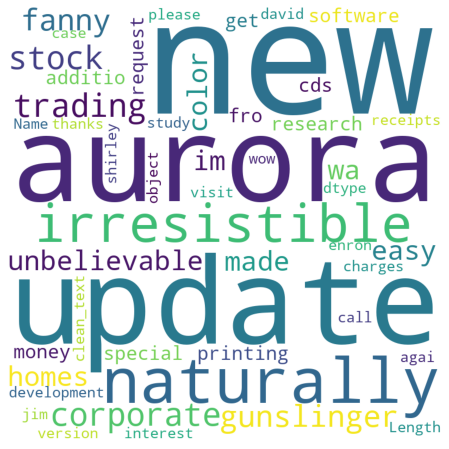

In [22]:
# plot the wordcloud
fig = fig = plt.figure(figsize = (8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')

In [23]:
# path of the clean file
cleaned_csv = '../out/cleaned_emails.csv'

# write the cleaned text back to a csv file with only the cleaned text column and response column (spam)
df_unique[['clean_text', 'spam']].to_csv(cleaned_csv, index=False)